In [17]:
import sys
import os
sys.path.append(os.environ["CODE_REPOSITORY"])
from code_repository.hotones.thetools import *
import matplotlib.pyplot as plt
from snudda.utils.load import SnuddaLoad

In [18]:
external = os.path.join("/media","jofrony", "2TB", "dardel","current_bgd2","population_unit", "complete_network", "supercomputer", "networks")

In [19]:
folder = "connectivity"

In [20]:
e = Experiments()
e.add_experiment(name="p0125",
                 color="black",
                 label="p=0.125",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-p0125"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-44-09_p1.hdf5")
e.add_experiment(name="p025",
                 color="blue",
                 label="p=0.25",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-p025"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-45-19_p1.hdf5")
e.add_experiment(name="p05",
                 color="green",
                 label="p=0.5",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-p05"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-46-27_p1.hdf5")

In [21]:
sl = LoadSimulations(experiments=e)
sl.load_network_file(load_synapses=True)

Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/complete_network/supercomputer/networks/pdc_network_2022-08-31-p0125/simulation/network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-44-09_p1.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/complete_network/supercomputer/networks/pdc_network_2022-08-31-p025/simulation/network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-45-19_p1.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/complete_network/supercomputer/networks/pdc_network_2022-08-31-p05/simulation/network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-46-27_p1.hdf5


In [22]:
colors = ["grey","green" ,"blue"]

In [23]:
%%time
neuron_type = "dSPN"
connectivity_dspn = connectivity_analysis(data_obj=sl, pre=["dSPN", "iSPN", "FS"], post=neuron_type, max_post=300)

CPU times: user 4min 28s, sys: 1min 6s, total: 5min 34s
Wall time: 5min 34s


In [24]:
customize = {plt.ylim:(0,1500)}

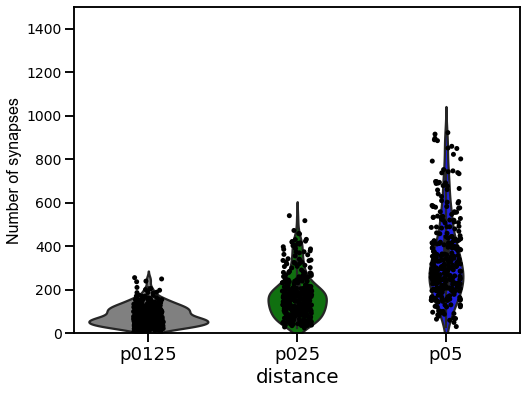

In [25]:
plot_synapses_violin(connectivity_dspn[0], experiment_names=e, colors=colors, name=neuron_type, folder=folder, save=True, customize=customize)

In [26]:
%%time
neuron_type = "iSPN"
connectivity_ispn = connectivity_analysis(data_obj=sl, pre=["dSPN", "iSPN", "FS"], post=neuron_type, max_post=300)

CPU times: user 4min 16s, sys: 1min 5s, total: 5min 22s
Wall time: 5min 22s


In [27]:
customize = {plt.ylim:(0,1500)}

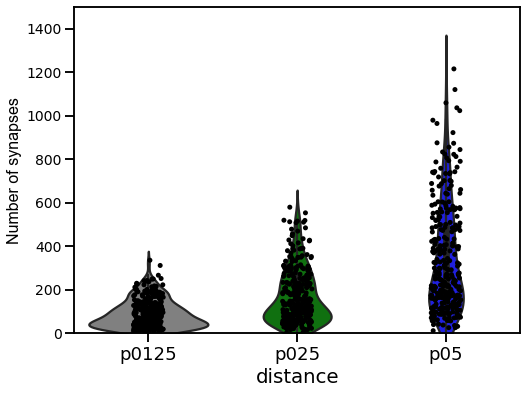

In [28]:
plot_synapses_violin(connectivity_ispn[0], experiment_names=e, colors=colors, name=neuron_type, folder=folder, save=True, customize=customize)

In [29]:
global_connectivity = {k: dict() for k in sl.get_experiment_names()}

In [30]:
for c in global_connectivity:
    for ids in connectivity_ispn[0][c]:
        global_connectivity[c].update({ids: connectivity_ispn[0][c][ids]})

In [31]:
for c in global_connectivity:
    for ids in connectivity_dspn[0][c]:
        global_connectivity[c].update({ids: connectivity_dspn[0][c][ids]})

In [32]:
neuron_type="SPN"

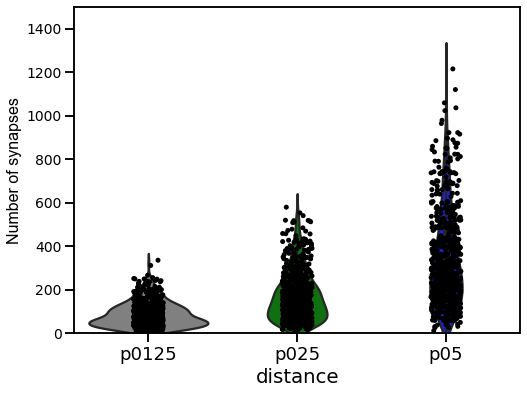

In [33]:
plot_synapses_violin(global_connectivity, experiment_names=e, colors=colors, name=neuron_type, folder=folder, save=True,customize=customize)